In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

In [10]:
train_dir = 'data/train'
validation_dir = 'data/validation'

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary')

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8333 - loss: 0.6652 - val_accuracy: 0.6667 - val_loss: 2.0901
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step - accuracy: 0.6667 - loss: 3.0424 - val_accuracy: 0.8333 - val_loss: 0.4250
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step - accuracy: 0.8333 - loss: 0.2677 - val_accuracy: 0.3333 - val_loss: 1.5378
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - accuracy: 0.3333 - loss: 1.2958 - val_accuracy: 0.5000 - val_loss: 1.0115
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step - accuracy: 0.5000 - loss: 0.8139 - val_accuracy: 0.8333 - val_loss: 0.3811
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - accuracy: 0.6667 - loss: 0.4539 - val_accuracy: 1.0000 - val_loss: 0.2774
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - accuracy: 0.6667 - loss: 0.3343 - val_accuracy: 0.6667 - val_loss: 0.3690
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - accuracy: 1.0000 - loss: 0.2077 - val_accuracy: 0.6667 - val_loss: 0.

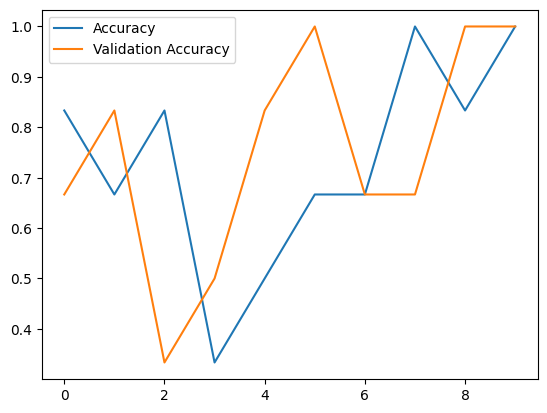

In [19]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [20]:
model.save('cat_dog_classifier.h5')